In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv("../data/customer_data.csv")
df.head()


,Age,Gender,Annual_Income,Spending_Score,Previous_Purchase,Engagement_Score,Purchased
0,25,Male,40000,60,Yes,7,1
1,30,Female,52000,80,Yes,8,1
2,22,Male,30000,40,No,4,0
3,35,Female,65000,90,Yes,9,1
4,40,Male,70000,20,No,3,0


In [10]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                10 non-null     int64 
 1   Gender             10 non-null     object
 2   Annual_Income      10 non-null     int64 
 3   Spending_Score     10 non-null     int64 
 4   Previous_Purchase  10 non-null     object
 5   Engagement_Score   10 non-null     int64 
 6   Purchased          10 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 692.0+ bytes


,Age,Annual_Income,Spending_Score,Engagement_Score,Purchased
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,33.500000,56900.000000,58.000000,5.900000,0.600000
std,9.058452,17406.576024,22.632327,2.330951,0.516398
min,22.000000,30000.000000,20.000000,2.000000,0.000000
25%,27.250000,45750.000000,42.500000,4.250000,0.000000
50%,31.500000,54000.000000,62.500000,6.500000,1.000000
75%,38.750000,68750.000000,73.750000,7.750000,1.000000
max,50.000000,85000.000000,90.000000,9.000000,1.000000


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Previous_Purchase'] = le.fit_transform(df['Previous_Purchase'])


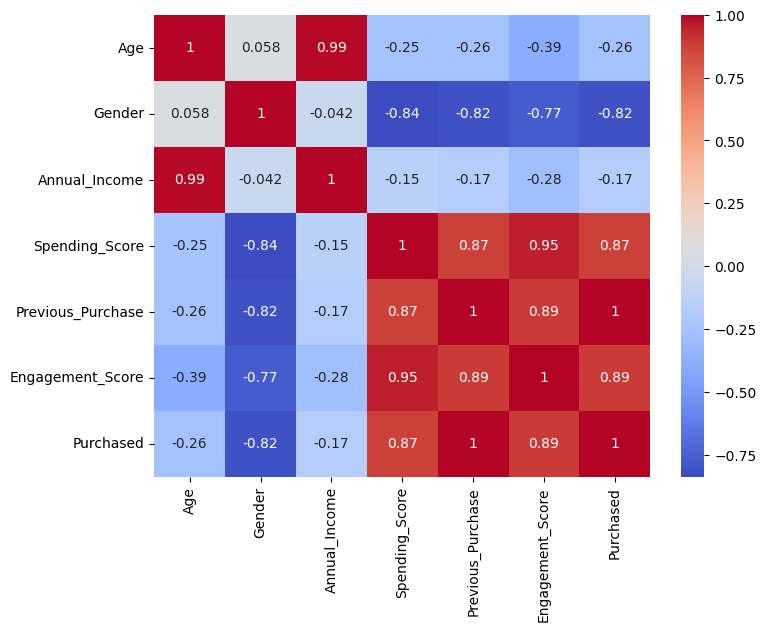

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [13]:
X = df.drop("Purchased", axis=1)
y = df["Purchased"]


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    random_state=42
)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, lr.predict(X_test)))

print("Random Forest Accuracy:",
      accuracy_score(y_test, rf.predict(X_test)))

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, rf.predict(X_test)))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, rf.predict(X_test)))


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0

Confusion Matrix (Random Forest):
[[1 0]
 [0 1]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [21]:
import pickle

pickle.dump(rf, open("../models/best_model.pkl", "wb"))
pickle.dump(scaler, open("../models/scaler.pkl", "wb"))

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
